In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(5,5)


In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis

In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null Values

In [7]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [8]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [10]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
data.drop('id',axis=1,inplace=True)

In [13]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Outlier Removation

In [14]:
from matplotlib.pyplot import figure
figure(num=None,figsize=(8,6),dpi=800,facecolor='w',edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

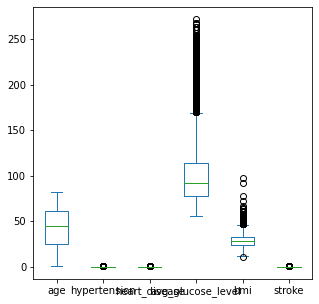

In [15]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [18]:
gender=enc.fit_transform(data['gender'])

In [19]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [20]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [21]:
data['work_type']=work_type

In [22]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [23]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.4 KB


# Splitting the data into train and test

x_train_x, test_x 80/20

y_train_y,test_y

In [27]:
x=data.drop('stroke',axis=1)

In [28]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [29]:
y=data['stroke']

In [30]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,1,60.0,0,0,1,2,0,65.16,30.8,2
246,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,1,76.0,0,0,1,2,1,58.65,25.6,3
...,...,...,...,...,...,...,...,...,...,...
4931,0,53.0,1,0,1,0,0,98.61,38.8,3
3264,0,61.0,0,0,1,2,0,72.01,26.0,1
1653,1,44.0,0,0,1,2,0,94.71,28.4,3
2607,1,21.0,0,0,0,2,1,120.94,29.7,1


In [33]:
y_train

3029    0
2277    0
3002    0
246     1
2825    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: stroke, Length: 4088, dtype: int64

In [34]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,1,82.0,0,1,1,2,1,144.90,26.400000,3
380,1,4.0,0,0,0,4,0,106.22,16.700000,0
3524,1,58.0,0,0,1,2,1,79.95,25.900000,2
352,0,20.0,0,0,0,2,0,96.57,34.100000,2
4927,0,10.0,0,0,0,4,0,69.84,13.700000,0
...,...,...,...,...,...,...,...,...,...,...
472,0,43.0,0,0,1,2,0,75.05,22.900000,3
4446,0,42.0,0,0,1,2,1,191.94,27.900000,2
660,1,52.0,0,0,0,2,0,69.37,36.200000,0
57,1,78.0,0,0,1,2,1,237.75,28.893237,1


In [35]:
y_test

42      1
380     0
3524    0
352     0
4927    0
       ..
472     0
4446    0
660     0
57      1
2367    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [36]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [41]:
x_train_sc

array([[-0.8361144 , -0.32824306, -0.33206349, ..., -0.86023092,
         0.99513416, -0.35492266],
       [-0.8361144 , -0.41649391, -0.33206349, ..., -0.50170259,
         2.50152031, -0.35492266],
       [ 1.193598  ,  0.73076708, -0.33206349, ..., -0.90725464,
         0.24194108,  0.57814732],
       ...,
       [ 1.193598  ,  0.02476032, -0.33206349, ..., -0.25488321,
        -0.06444255,  1.5112173 ],
       [ 1.193598  , -0.9901244 , -0.33206349, ...,  0.32419302,
         0.10151525, -0.35492266],
       [-0.8361144 ,  0.64251624,  3.01147232, ..., -1.03176818,
         0.5483247 ,  0.57814732]])

In [42]:
x_test_sc

array([[ 1.16630919,  1.77042613, -0.31452302, ...,  0.86672167,
        -0.34334338,  1.52974071],
       [ 1.16630919, -1.71480651, -0.31452302, ...,  0.01111889,
        -1.7043756 , -1.27371716],
       [ 1.16630919,  0.69804686, -0.31452302, ..., -0.56997432,
        -0.41349968,  0.59525475],
       ...,
       [ 1.16630919,  0.42995204, -0.31452302, ..., -0.80400424,
         1.03172009, -1.27371716],
       [ 1.16630919,  1.59169625, -0.31452302, ...,  2.9205665 ,
         0.00648917, -0.3392312 ],
       [-0.85740557, -0.32964995, -0.31452302, ..., -0.49653581,
        -1.26940654, -0.3392312 ]])

# Training 

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [44]:
dt.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [45]:
dt.feature_importances_

array([0.02787632, 0.19414957, 0.03644737, 0.01925969, 0.00796031,
       0.03494612, 0.05017737, 0.29555516, 0.26131243, 0.07231566])

In [46]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [47]:
y_pred=dt.predict(x_test_sc)

In [48]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(y_test,y_pred)
ac_dt

0.923679060665362

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [52]:
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [53]:
y_pred=lr.predict(x_test_sc)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
ac_lr=accuracy_score(y_test,y_pred)
ac_lr

0.9471624266144814

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [56]:
knn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [57]:
y_pred=knn.predict(x_test_sc)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
ac_knn=accuracy_score(y_test,y_pred)
ac_knn

0.9471624266144814

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [60]:
rf.fit(x_train_sc,y_train)

RandomForestClassifier()

In [61]:
y_pred=rf.predict(x_test_sc)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
ac_rf=accuracy_score(y_test,y_pred)
ac_rf

0.9461839530332681

# SVM

In [63]:
from sklearn.svm import SVC

In [64]:
sv=SVC()

In [65]:
sv.fit(x_train_sc,y_train)

SVC()

In [66]:
y_pred=sv.predict(x_test_sc)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
ac_sv=accuracy_score(y_test,y_pred)
ac_sv

0.9471624266144814

In [68]:
ac_lr

0.9471624266144814

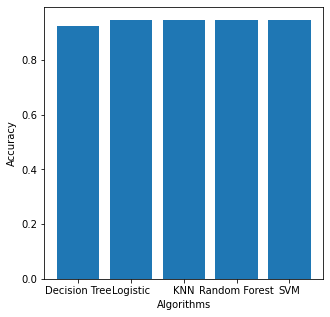

In [69]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()